## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pathlib
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sylvia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
home = pathlib.Path.home() / ".env"  # for pc 1/2
load_dotenv(dotenv_path=home)  # for pc 2/2
api_key = os.getenv("news_api")
type(api_key)

str

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key= api_key)

In [4]:
# Fetch the Bitcoin news articles
Bitcoin_articles = newsapi.get_everything(q="Bitcoin", language="en", sort_by= "relevancy")
print(f"Fetch news status: {Bitcoin_articles['status']}.\n ",
        f"There are {Bitcoin_articles['totalResults']} articles returned. \n" ,
        f"Peek of the first article: {Bitcoin_articles['articles'][0]}")


Fetch news status: ok.
  There are 8044 articles returned. 
 Peek of the first article: {'source': {'id': None, 'name': 'New York Times'}, 'author': 'Corey Kilgannon', 'title': 'Why New York State Is Experiencing a Bitcoin Boom', 'description': 'Cryptocurrency miners are flocking to New York’s faded industrial towns, prompting concern over the environmental impact of huge computer farms.', 'url': 'https://www.nytimes.com/2021/12/05/nyregion/bitcoin-mining-upstate-new-york.html', 'urlToImage': 'https://static01.nyt.com/images/2021/11/25/nyregion/00nybitcoin5/00nybitcoin5-facebookJumbo.jpg', 'publishedAt': '2021-12-06T00:42:28Z', 'content': 'The plant opening northeast of Niagara Falls this month, in Somerset, N.Y., is part of a $550 million project by Terawulf, a Bitcoin mining company. The project also includes a proposed 150-megawatt … [+1514 chars]'}


In [5]:
# Fetch the Ethereum news articles
Ethereum_articles = newsapi.get_everything(q= "Ethereum", language="en", sort_by = "relevancy")
#preview of the first article 
Ethereum_articles["articles"][0]

{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Mitchell Clark',
 'title': 'The NFT Bay asks if you would steal all the JPEGs',
 'description': 'The NFT Bay is an incredible piece of performance art that promises to let you download all the NFTs on the Ethereum blockchain. The torrent contains nearly 20TB worth of files, and works as a commentary on collecting and owning.',
 'url': 'https://www.theverge.com/2021/11/18/22790131/nft-bay-pirating-digital-ownership-piracy-crypto-art-right-click',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/UMHdxnP0BlxxYxbIu9Ea5K1QwGk=/0x0:2028x1062/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/23025815/Screen_Shot_2021_11_18_at_14.21.58.png',
 'publishedAt': '2021-11-19T02:01:07Z',
 'content': 'If you claim ownership, someone will probably want to take it\r\nIn what may be one of the better pieces of performance art this year, Australian Geoffrey Huntley has created a website that promises to… [+4542 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []
for article in Bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        Bitcoin_sentiments.append(
            {
                "text" : text
                ,"date" : date
                , "compound" : compound
                , "positive" : pos
                , "negative" : neg
                , "neutral" : neu
            }
        )
    except AttributeError:
        pass

Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)
Bitcoin_df.head()


,text,date,compound,positive,negative,neutral
0,The plant opening northeast of Niagara Falls t...,2021-12-06,0.0000,0.000,0.0,1.000
1,"Earlier this year, Nothing released a pair of ...",2021-12-01,0.5106,0.099,0.0,0.901
2,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...",2021-11-22,0.0000,0.000,0.0,1.000
3,"In keeping with a previous announcement, AMC t...",2021-11-12,0.5719,0.153,0.0,0.847
4,Posted \r\nAfter becoming the first country to...,2021-11-22,0.4767,0.136,0.0,0.864


In [7]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiments = []
for article in Ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][0:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        Ethereum_sentiments.append(
            {
                "text" : text
                ,"date" : date
                , "compound" : compound
                , "positive" : pos
                , "negative" : neg
                , "neutral" : neu
            }
        )
    except AttributeError:
        pass
        
Ethereum_df = pd.DataFrame(Ethereum_sentiments)
Ethereum_df.head()


,text,date,compound,positive,negative,neutral
0,"If you claim ownership, someone will probably ...",2021-11-19,0.7783,0.216,0.000,0.784
1,More than $1.2 million has already been spent ...,2021-11-24,0.0000,0.000,0.000,1.000
2,"In keeping with a previous announcement, AMC t...",2021-11-12,0.5719,0.153,0.000,0.847
3,Ethereum has been on a tear this year. Its out...,2021-11-23,0.6542,0.178,0.000,0.822
4,Blockchain startup MonoX Finance said on Wedne...,2021-12-02,-0.0516,0.074,0.079,0.847


In [8]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.099135,0.043900,0.016200,0.939900
std,0.305228,0.065594,0.029573,0.068112
min,-0.381800,0.000000,0.000000,0.791000
25%,0.000000,0.000000,0.000000,0.891750
50%,0.000000,0.000000,0.000000,0.957000
75%,0.463275,0.108250,0.010750,1.000000
max,0.571900,0.158000,0.080000,1.000000


In [9]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,0.250890,0.084150,0.02620,0.889550
std,0.316803,0.070344,0.03871,0.079778
min,-0.318200,0.000000,0.00000,0.729000
25%,0.000000,0.032250,0.00000,0.831750
50%,0.248950,0.075000,0.00000,0.910500
75%,0.429075,0.121500,0.06200,0.945250
max,0.817600,0.221000,0.11500,1.000000


### Questions:

* **Q: Which coin had the highest mean positive score?**

A: Regarding to "mean positive score", Bitcoin is 0.043900 and Ethereum is 0.084150. So Ethereum has a higher mean positive score. 

* **Q: Which coin had the highest compound score?**

A: Regarding to "max compound score", Bitcoin is 0.571900 and Ethereum is 0.817600. So Ethereum has the highest  compound score. 

* **Q. Which coin had the highest positive score?**

A: Regarding to "max positive score", Bitcoin is 0.158000 and Ethereum is 0.221000. So Ethereum has the hightest postive score. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [141]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
nltk.download('stopwords')
sw = set(stopwords.words('english'))


# Expand the default stopwords list if necessary
sw_addon = {'said','el','reuters','the'}
sw = sw.union(sw_addon)
#type(sw)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sylvia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [142]:
# Complete the tokenizer function
def tokenizer(text):
   # """Tokenizes text."""

    # Remove the punctuation from text
    import re
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    #sentence = sent_tokenize(re_clean)
    words = word_tokenize(re_clean)
    # Remove the stop words
   # Convert the words to lowercase
    lower_cleaned_words = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in lower_cleaned_words]

    return tokens


In [157]:
# Create a new tokens column for Bitcoin
Bitcoin_df["tokens"]= Bitcoin_df["text"].apply(tokenizer)
Bitcoin_df.head()


,text,date,compound,positive,negative,neutral,tokens
0,The plant opening northeast of Niagara Falls t...,2021-12-06,0.0000,0.000,0.0,1.000,"[plant, opening, northeast, niagara, fall, mon..."
1,"Earlier this year, Nothing released a pair of ...",2021-12-01,0.5106,0.099,0.0,0.901,"[earlier, year, nothing, released, pair, relat..."
2,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...",2021-11-22,0.0000,0.000,0.0,1.000,"[mizata, salvadorlondon, nov, salvador, plan, ..."
3,"In keeping with a previous announcement, AMC t...",2021-11-12,0.5719,0.153,0.0,0.847,"[keeping, previous, announcement, amc, theater..."
4,Posted \r\nAfter becoming the first country to...,2021-11-22,0.4767,0.136,0.0,0.864,"[posted, becoming, first, country, accept, cry..."


In [143]:
# Create a new tokens column for Ethereum
Ethereum_df["tokens"]= Ethereum_df["text"].apply(tokenizer)
Ethereum_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,"If you claim ownership, someone will probably ...",2021-11-19,0.7783,0.216,0.000,0.784,"[claim, ownership, someone, probably, want, ta..."
1,More than $1.2 million has already been spent ...,2021-11-24,0.0000,0.000,0.000,1.000,"[million, already, spent, gas, feesone, remain..."
2,"In keeping with a previous announcement, AMC t...",2021-11-12,0.5719,0.153,0.000,0.847,"[keeping, previous, announcement, amc, theater..."
3,Ethereum has been on a tear this year. Its out...,2021-11-23,0.6542,0.178,0.000,0.822,"[ethereum, tear, year, outperformed, bitcoin, ..."
4,Blockchain startup MonoX Finance said on Wedne...,2021-12-02,-0.0516,0.074,0.079,0.847,"[blockchain, startup, monox, finance, wednesda..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [126]:
from collections import Counter
from nltk import ngrams

In [117]:
# Generate the Bitcoin N-grams where N=2
btc_ngram_list = []
for i in Bitcoin_df["tokens"].index:  
    btc_ngram = ngrams(Bitcoin_df["tokens"][i], n=2)
    btc_ngram_list.append(list(btc_ngram))
#print(btc_ngram_list)

In [127]:
# Generate the Ethereum N-grams where N=2
# for i in Ethereum_df["tokens"].index:  
#     eth_ngram = ngrams(Ethereum_df["tokens"][i], n=2)
#     print(list(eth_ngram))

eth_ngram_list = []
for i in Ethereum_df["tokens"].index:  
    eth_ngram = ngrams(Ethereum_df["tokens"][i], n=2)
    eth_ngram_list.append(list(eth_ngram))
#print(eth_ngram_list)


In [175]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    from collections import Counter
    words_counts = Counter(tokens)
    #print(dict(words_counts))

    return Counter(tokens).most_common(N)

In [179]:
# Use token_count to get the top 10 words for Bitcoin
btc_tokens_all = []
for row in Bitcoin_df["tokens"].index:
    btc_tokens_all = btc_tokens_all +  Bitcoin_df["tokens"][row]

token_count(btc_tokens_all, 10)

# # 2nd method: use CounterVectorizer function: 
# vectorizer = CountVectorizer(stop_words = sw)
# X = vectorizer.fit_transform(btc_tokens_all)
# words = vectorizer.get_feature_names()
# words_df = pd.DataFrame(list(zip(words,numpy.ravel(X.sum(axis=0)))),columns=["Word","Word_Count"])
# word_sorted = words_df.sort_values(by =['Word_Count'], ascending=False)
# word_sorted[:10]


[('bitcoin', 18),
 ('char', 18),
 ('world', 7),
 ('cryptocurrency', 6),
 ('first', 5),
 ('posted', 5),
 ('company', 4),
 ('billion', 4),
 ('project', 3),
 ('ear', 3)]

In [180]:
# Use token_count to get the top 10 words for Ethereum
eth_tokens_all = []
for row in Ethereum_df["tokens"].index:
    eth_tokens_all = eth_tokens_all +  Ethereum_df["tokens"][row]

token_count(eth_tokens_all, 10)

[('char', 19),
 ('year', 6),
 ('bitcoin', 6),
 ('cryptocurrency', 4),
 ('copy', 3),
 ('ethereum', 3),
 ('finance', 3),
 ('ear', 3),
 ('earbuds', 3),
 ('company', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [131]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

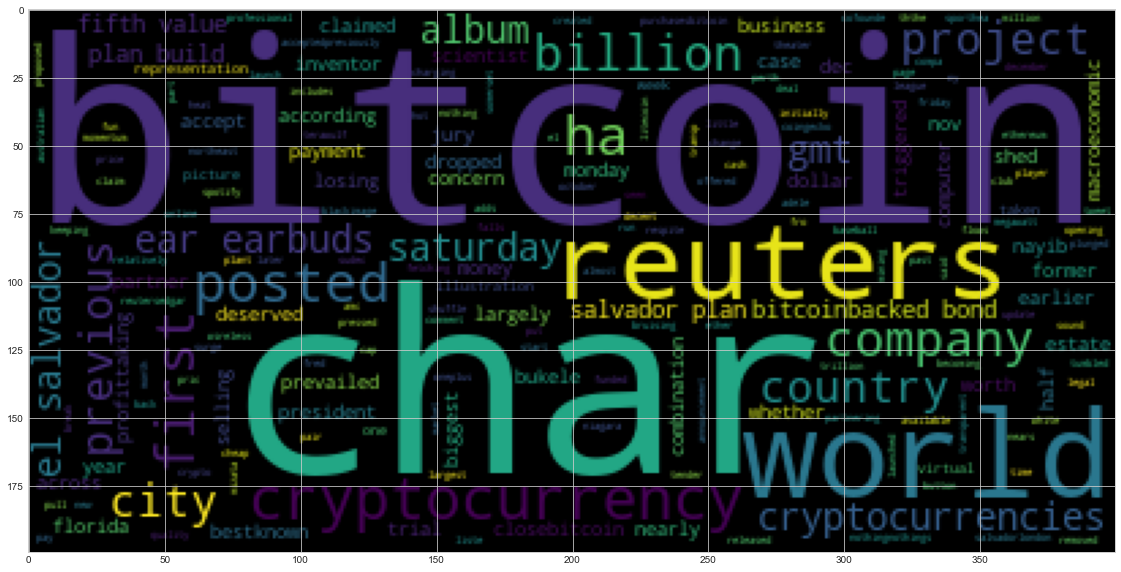

In [181]:
# Generate the Bitcoin word cloud
# define a function to process text
def process_text(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('',text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output =[word.lower() for word in lem if word.lower()not in sw]
    return ' '.join(output)


btc_big_string = ' '.join(Bitcoin_df["text"])
input_text = process_text(btc_big_string)
wc = WordCloud().generate(input_text )
plt.imshow(wc)

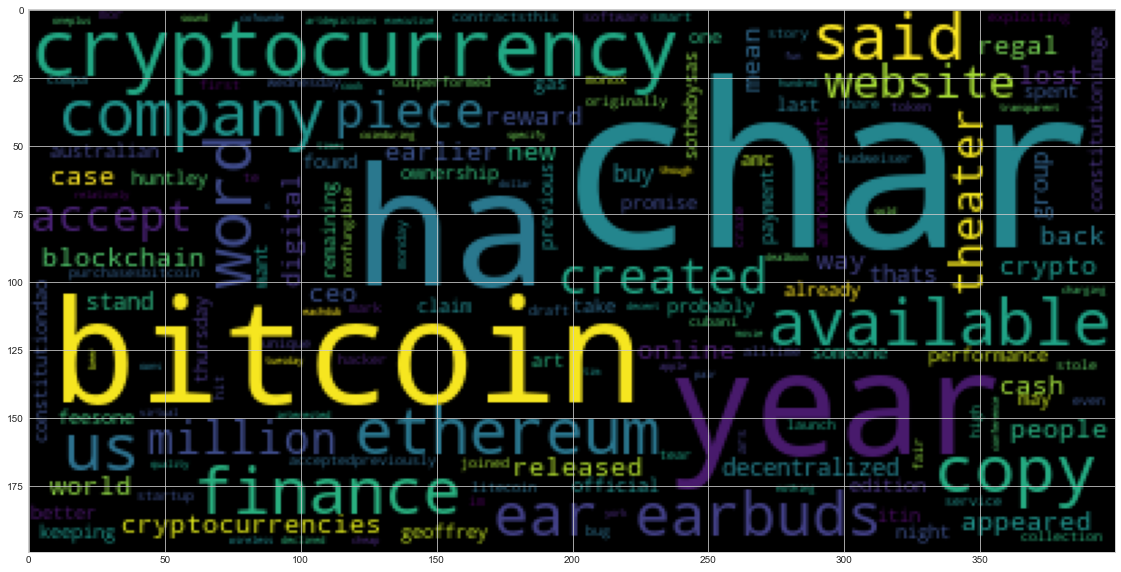

In [182]:
# Generate the Ethereum word cloud
eth_big_string = ' '.join(Ethereum_df["text"])
input_text = process_text(eth_big_string)
wc = WordCloud().generate(input_text )
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [183]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
nlp = spacy.load("en_core_web_sm")


---
### Bitcoin NER

In [187]:
# Concatenate all of the Bitcoin text together
bitcoin_text = ' '.join(Bitcoin_df["text"])
bitcoin_text[:100]

'The plant opening northeast of Niagara Falls this month, in Somerset, N.Y., is part of a $550 millio'

In [197]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"


In [198]:
# Render the visualization
displacy.render(doc, style='ent')

In [225]:
# List all Entities

labels = [ent.label_ for ent in doc.ents]
# remove duplicates in list:
labels = list(dict.fromkeys(labels))
entities = [ent.text for ent in doc.ents]
# remove duplicates from the list
entities = list(dict.fromkeys(entities))
entities

# for ent in doc.ents:
#     print(ent.text, ent.label_)


['this year',
 'Australian Geoffrey Huntley',
 'More than $1.2 million',
 'One',
 '13',
 'the Official Edition of the',
 'Constitution',
 'Sothebys',
 'last Thursday',
 'night',
 'ConstitutionDAO',
 'AMC',
 'Mark Cuban',
 'Wednesday',
 '$31 million',
 'Ars Te',
 'Monday',
 'Budweiser',
 'first',
 'hundreds of dollars',
 'Earlier this year',
 '99',
 'OnePlus',
 'Apple',
 'Tim Cook',
 "The New York Times'",
 'Tuesday',
 'Shutterstock',
 'Regal Cinemas',
 'more than 500',
 'dozens',
 'Google',
 'Search',
 '2021',
 'Squid Game',
 'year-long',
 'Xboxs',
 'Halo Infinite',
 'MicroStrategy',
 'Michael SaylorJoe Raedle/Getty Images',
 'ETF',
 'December 13th',
 'The Ear 1',
 'Nothings Ear 1',
 'earlier this year',
 '1-2%',
 'less than two weeks',
 'DeFi',
 'Ethereum',
 'The U.S. Captioning Company',
 'the British Institute of Verbatim Reporters',
 'Getty Images',
 'US',
 '20',
 'NFT']

---

### Ethereum NER

In [214]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(Ethereum_df["text"])
eth_text[:100]

'If you claim ownership, someone will probably want to take it\r\nIn what may be one of the better piec'

In [216]:
# Run the NER processor on all of the text
doc = nlp(eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [217]:
# Render the visualization
displacy.render(doc, style= "ent" )

In [227]:
# List all Entities
labels = [ent.label_ for ent in doc.ents  ]
# remove duplicates in list:
labels = list(dict.fromkeys(labels))
entities =[ent.text for ent in doc.ents]
# remove duplicates in list:
entities = list(dict.fromkeys(entities))
entities

# for ent in doc.ents:
#     print(ent.text, ent.label_)

['this year',
 'Australian Geoffrey Huntley',
 'More than $1.2 million',
 'One',
 '13',
 'the Official Edition of the',
 'Constitution',
 'Sothebys',
 'last Thursday',
 'night',
 'ConstitutionDAO',
 'AMC',
 'Mark Cuban',
 'Wednesday',
 '$31 million',
 'Ars Te',
 'Monday',
 'Budweiser',
 'first',
 'hundreds of dollars',
 'Earlier this year',
 '99',
 'OnePlus',
 'Apple',
 'Tim Cook',
 "The New York Times'",
 'Tuesday',
 'Shutterstock',
 'Regal Cinemas',
 'more than 500',
 'dozens',
 'Google',
 'Search',
 '2021',
 'Squid Game',
 'year-long',
 'Xboxs',
 'Halo Infinite',
 'MicroStrategy',
 'Michael SaylorJoe Raedle/Getty Images',
 'ETF',
 'December 13th',
 'The Ear 1',
 'Nothings Ear 1',
 'earlier this year',
 '1-2%',
 'less than two weeks',
 'DeFi',
 'Ethereum',
 'The U.S. Captioning Company',
 'the British Institute of Verbatim Reporters',
 'Getty Images',
 'US',
 '20',
 'NFT']

---